# <center>Herding</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
from genGM import *

In [2]:
sigma = 0.5
mus = [[1.7644,1.0278],[2.2174,-2.722],[1.0073,-0.9821],[2.1473,0.2475],[-1.9556,-3.5406],[-1.0021,3.2158],[0.9342,-0.5304],[-3.7110,-2.5693],[3.8438,-3.1127],[2.8168,-3.2514],[-3.0731,2.7305],[0.228,-2.8512],[-1.9643,-1.0489],[-1.3097,-2.8430],[-3.3647,0.795],[1.3437,-1.0198],[2.1017,-0.5647],[-1.7266,-1.7964],[-0.8518,1.4021],[2.9369,-3.3802]]
sigmas = [
    [[0.1727,0.0043],[0.0043,0.1063]],
    [[0.2909,-0.0007],[-0.0007,0.2671]],
    [[3.0541,2.3127],[2.3127,1.8809]],
    [[0.2046,0.1296],[0.1296,0.1936]],
    [[0.2325,0.3529],[0.3529,1.3044]],
    [[0.1734,-0.0208],[-0.0208,0.0712]],
    [[0.6385,0.1571],[0.1571,0.1055]],
    [[0.8177,0.5617],[0.5617,0.6469]],
    [[1.0715,0.6782],[0.6782,0.5498]],
    [[0.4471,-0.1659],[-0.1659,0.5147]],
    [[0.2294,-0.0006],[-0.0006,0.0672]],
    [[0.0842,-0.006],[-0.006,0.0672]],
    [[0.4279,0.025],[0.025,0.2014]],
    [[0.2681,0.0328],[0.0328,0.3009]],
    [[0.2463,-0.0739],[-0.0739,0.1261]],
    [[0.8137,0.4627],[0.4627,0.4359]],
    [[2.1496,1.2296],[1.2296,1.9657]],
    [[0.5496,-0.1593],[-0.1593,0.1295]],
    [[0.2417,0.1835],[0.1835,0.6737]],
    [[0.5981,0.3097],[0.3097,0.4669]]
]
p = [0.0508,0.0537,0.0343,0.0393,0.0452,0.0518,0.0285,0.0676,0.0354,0.053,0.0575,0.0527,0.0461,0.0614,0.0424,0.0532,0.0605,0.0457,0.0593,0.0614]

mus = np.array(mus)
sigmas = np.array(sigmas)

In [3]:
N = 1000
Z = np.random.multinomial(N,p)
X2 = []
for k in range(len(Z)):
    normals = np.random.multivariate_normal(mus[k],sigmas[k],size=Z[k])
    for g in normals:
        X2.append(g)
        
X2 = np.array(X2)

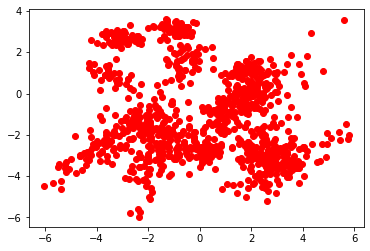

In [4]:
plt.plot(X2[:,0],X2[:,1],'ro')
plt.show()

In [5]:
def mixture(x,mus=mus,p=p,sigma=sigma):
    s = 0
    for k in range(len(p)):
        s += p[k]*multivariate_normal.pdf(x,mus[k],sigma)
    return s

In [6]:
def plotDensity(density=mixture):
    """
        plot the density of mixture_d_2
    """
    N = 50
    z = np.zeros([N,N])
    x = np.zeros([N,N])
    y = np.zeros([N,N])
    xmin = -6
    xmax = 6
    ymin = -6
    ymax = 4

    x1 = np.linspace(xmin,xmax,N)
    y1 = np.linspace(ymin,ymax,N)
    for i in range(N):
        for j in range(N):
            x[i,j] = x1[i]
            y[i,j] = y1[j]
            z[i,j] = density([x1[i],y1[j]],mus,p)

    return x,y,z

In [84]:
def plotContour(gm,samples=None):
    stdsig = 2

    xx, yy = np.mgrid[np.min(
    mus[:,0])-stdsig:np.max(mus[:,0])+stdsig:.1, np.min(mus[:,1])-stdsig:np.max(mus[:,1])+stdsig:.1]
    # xx, yy = np.mgrid[-4:6:.1, -4:6:.1]
    pos = np.empty(xx.shape + (2,))
    pos[:,:,0] = xx; pos[:,:,1] = yy

    f = gm.pdf(pos)

    plt.contour(xx, yy, f, 20)
    # plt.scatter(*mus.T, facecolors='none', edgecolors='r')
    if samples is not None:
        plt.scatter(samples[:,0],samples[:,1],c='red',marker='x')
    plt.show()

In [7]:
def multivariate_gaussian(pos, mu, Sigma):
    """
        Return the multivariate Gaussian distribution on array pos.

        Input:
        - pos is an array constructed by packing the meshed arrays of variables
        x_1, x_2, x_3, ..., x_k into its _last_ dimension.
        - mu: expectation of a gaussian
        - sigma: standard deviation of a gaussian
        
        Source: https://stackoverflow.com/questions/28342968/how-to-plot-a-2d-gaussian-with-different-sigma
    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

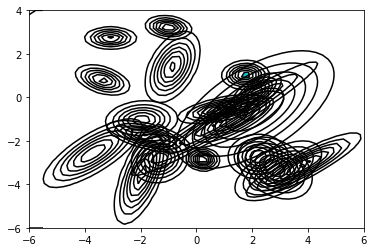

In [8]:
x = np.linspace(-6,6,50)
y = np.linspace(-6,4,50)

XX, Y = np.meshgrid(x, y)

pos = np.empty(XX.shape + (2,))
pos[:, :, 0] = XX
pos[:, :, 1] = Y

for k in range(len(p)):
    Z = multivariate_gaussian(pos, mus[k], sigmas[k])
    plt.contour(XX, Y, Z, colors='black')
    plt.scatter(mus[0][0],mus[0][1])

plt.show()

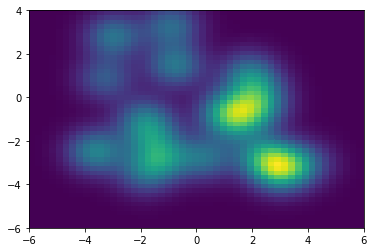

In [9]:
x,y,z = plotDensity()
plt.pcolormesh(x,y,z)
plt.show()

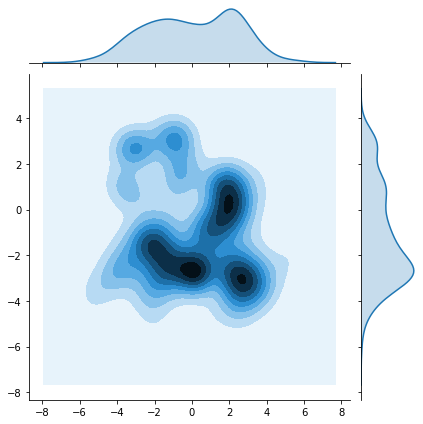

In [10]:
sns.jointplot(x=X2[:,0], y=X2[:,1], kind="kde");

In [11]:
def MH():
    pass

## Test Random Mixture

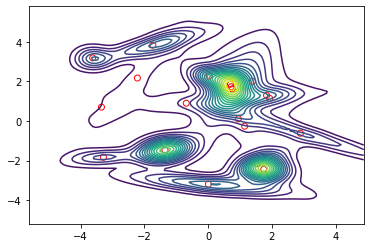

In [13]:
gm,dens = generate_GM(20, 2,Plot=True)

In [14]:
def plotDensity2(density=dens):
    """
        plot the density of mixture_d_2
    """
    N = 100
    z = np.zeros([N,N])
    x = np.zeros([N,N])
    y = np.zeros([N,N])
    xmin = -6
    xmax = 6
    ymin = -6
    ymax = 4

    x1 = np.linspace(xmin,xmax,N)
    y1 = np.linspace(ymin,ymax,N)
    for i in range(N):
        for j in range(N):
            x[i,j] = x1[i]
            y[i,j] = y1[j]
            z[i,j] = density([x1[i],y1[j]])

    return x,y,z

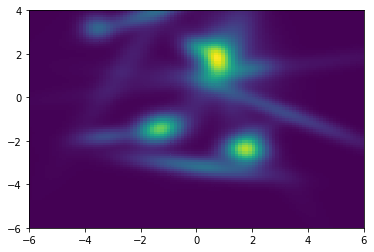

In [15]:
x,y,z = plotDensity2(density=gm.pdf)
plt.pcolormesh(x,y,z)
plt.show()

## Test Herding

In [12]:
class GaussianKernel():
    def __init__(self,sigma):
        self.covariance = sigma
    
    def pdf(self,x,x2):
        return multivariate_normal(x2,self.covariance).pdf(x)

In [29]:
def E_Gaussian(x,sigma0,mu,sigma):
    inv_sigma0 = np.linalg.inv(sigma0)
    inv_sigma = np.linalg.inv(sigma)
    inv_new_sigma = inv_sigma0+inv_sigma
    new_sigma = np.linalg.inv(inv_new_sigma)
    
    new_mu = inv_sigma0@x+inv_sigma@mu
    
    exp = np.exp(-(1/2)*(x.T@inv_sigma0@x+mu.T@inv_sigma@mu-new_mu.T@new_sigma@new_mu))
    
    return np.sqrt(np.linalg.det(new_sigma)/(np.linalg.det(sigma0)*np.linalg.det(sigma)))*exp/(2*np.pi)

In [30]:
def score(xx,yy,kernel,gm,samples):
    
    x = np.array([xx,yy])
    s = 0
    for k in range(len(gm.means)):
        s += gm.weights[k]*E_Gaussian(x,kernel.covariance,gm.means[k],gm.covariances[k])
    
    n = len(samples)
    for sample in samples:
        s -= kernel.pdf(x,sample)/(n+1)
    
    return s

In [59]:
def generate_herding(kernel,gm,area,samples):
    xa,xb,ya,yb = area
    x = xa+(xb-xa)*np.random.rand(100)
    y = ya+(yb-ya)*np.random.rand(100)
    
    maxi = -np.inf
    x_max = -np.inf
    y_max = -np.inf
    
    for xx in x:
        for yy in y:
            s = score(xx,yy,kernel,gm,samples)
            if(s>maxi):
                maxi = s
                x_max = xx
                y_max = yy
    return [x_max,y_max]    

In [56]:
def herding(num_samples,kernel,gm,area=[-6,6,-5,5],samples=[]):
    for k in range(num_samples):
        print(k)
        samples.append(generate_herding(kernel,gm,area,samples))
    return samples

In [57]:
kernel = GaussianKernel(np.array([[1,0],[0,1]]))
gm = GaussianMixture(p,mus,sigmas)

In [33]:
samples = herding(20,kernel,gm)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [34]:
samples = np.array(samples)

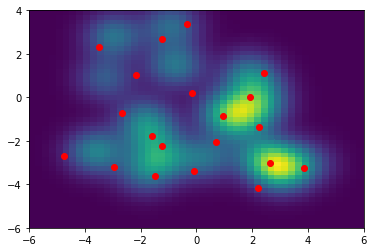

In [42]:
x,y,z = plotDensity()
plt.pcolormesh(x,y,z)
plt.scatter(samples[:,0],samples[:,1],c='red')
plt.show()

In [37]:
samples

array([[-1.23611334, -2.23731387],
       [ 2.63439056, -3.04265943],
       [ 1.91855812,  0.01097526],
       [-1.21808995,  2.66210437],
       [ 0.70705258, -2.07485071],
       [-2.65572675, -0.71375867],
       [-3.48124729,  2.29830871],
       [-2.93932401, -3.19392636],
       [-0.1400061 ,  0.2021444 ],
       [ 3.87253642, -3.27246141],
       [ 2.42847717,  1.12856406],
       [-0.10007785, -3.387213  ],
       [ 2.25718507, -1.34249763],
       [ 2.21929532, -4.1588687 ],
       [-1.59641761, -1.76100245],
       [-4.73694714, -2.68715156],
       [ 0.95934064, -0.83906695],
       [-2.17340247,  1.04667085],
       [-1.48627317, -3.62989695],
       [-0.33826945,  3.35600769]])

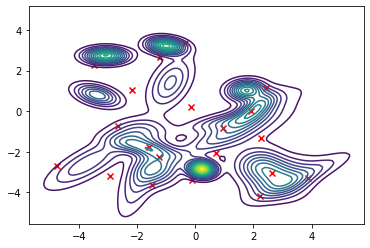

In [52]:
plotContour(gm,samples)

In [77]:
random_samples = []
x = -6+12*np.random.rand(10)
y = -6+12*np.random.rand(10)
x = x.reshape(-1,1)
y = y.reshape(-1,1)

random_sample = list(np.concatenate([x,y],axis=1))

In [79]:
samples = herding(20,kernel,gm,samples=random_sample)
samples = np.array(samples)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


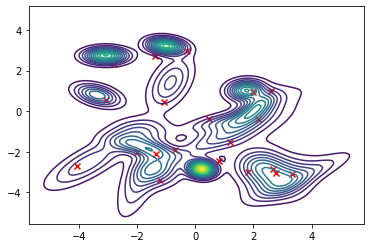

In [85]:
plotContour(gm,samples[10:])

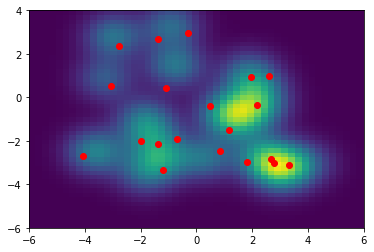

In [87]:
x,y,z = plotDensity()
plt.pcolormesh(x,y,z)
plt.scatter(samples[10:,0],samples[10:,1],c='red')
plt.show()